# Workflow & Hyperparameter Optimization

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")
# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [24]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## Train/Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##  Baseline KNN model

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn_1 = KNeighborsRegressor(n_neighbors=1)
average_score = cross_val_score(knn_1, X_train_scaled, y_train, cv=5).mean()
average_score

0.5601542887874071

##  GridSearch

###  A first GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {"n_neighbors": [1, 5, 10, 20, 50]}

# Instantiate Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

In [29]:
best_param = grid_search.best_params_

print("The optimal K value according to GridSearch is: ", best_param["n_neighbors"])

The optimal K value according to GridSearch is:  10


In [31]:
best_score = grid_search.best_score_

print("The best score for the optimal K value is: ", best_score)

The best score for the optimal K value is:  0.7596697382171873


### A second GridSearch

In [41]:
# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {"n_neighbors": list(range(6, 16))} 

# Instantiate Grid Search
grid_search_refined = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
grid_search_refined.fit(X_train_scaled, y_train)

best_score = grid_search_refined.best_score_
best_k = grid_search_refined.best_params_["n_neighbors"]

### Visual check (manual GridSearch)

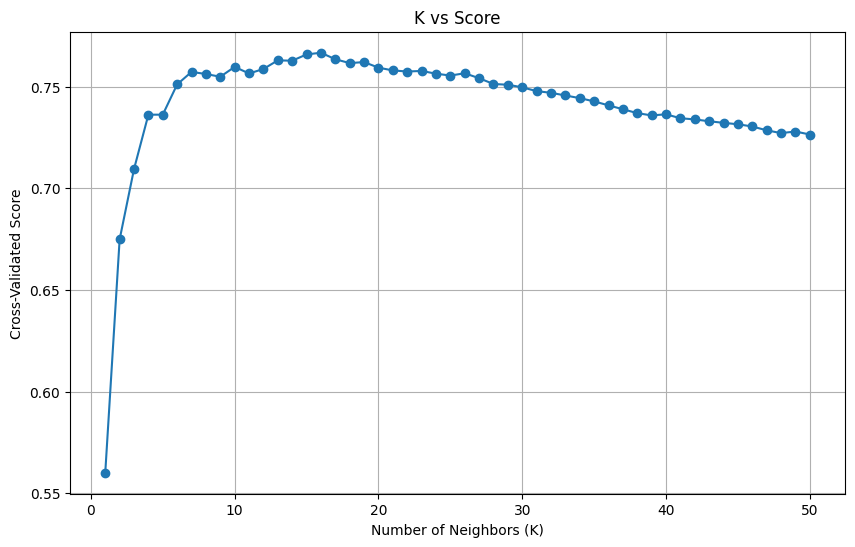

In [45]:
import matplotlib.pyplot as plt

# Initialize the list to store the scores
scores = []

# Iterate over a range of n_neighbors values
for k in range(1, 51):
    # Create a KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Compute the cross-validated score and append it to the list
    score = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=5))
    scores.append(score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), scores, marker="o", linestyle="-")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Score")
plt.title("K vs Score")
plt.grid(True)
plt.show()


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

In [48]:
# Instantiate model
knn = KNeighborsRegressor()
knn = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {
    "n_neighbors" : [1, 5, 10, 20, 50],
    "p": [1, 2, 3]
}
# Instantiate Grid Search
grid_search = GridSearchCV(knn,param_grid,cv=5,n_jobs=-1)


# Fit data to Grid Search
grid_search.fit(X_train_scaled,y_train)

# Print the best parameters and score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))


Best Parameters: {'n_neighbors': 10, 'p': 1}
Best Score: 0.7969255879201194


In [49]:
# Number of unique combinations of hyperparameters
n_combinations = len(grid_search.cv_results_["params"])

# Number of CV folds
n_folds = grid_search.cv

# Total number of models
total_models = n_combinations * n_folds

print(f"Total number of models trained: {total_models}")

Total number of models trained: 75


In [50]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best score
best_score = grid_search.best_score_
print(f"Best score: {best_score}")

Best parameters: {'n_neighbors': 10, 'p': 1}
Best score: 0.7969255879201194


## 6. Random Search

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Hyperparameter Grid
param_distributions = {"n_neighbors": randint(1, 50), "p": [1, 2, 3]}

# Instantiate Randomized Search
random_search = RandomizedSearchCV(knn, param_distributions, n_iter=15, cv=5, n_jobs=-1, random_state=42)

# Fit data to Randomized Search
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Score: {}".format(random_search.best_score_))


Best Parameters: {'n_neighbors': 8, 'p': 1}
Best Score: 0.7942356840941323


## 7. Generalization

In [54]:
# Adjust the parameter distributions
param_distributions = {"n_neighbors": randint(10, 20), "p": [1, 2, 3]}

# Increase n_iter
random_search = RandomizedSearchCV(knn, param_distributions, n_iter=30, cv=5, n_jobs=-1, random_state=42)

# Fit data to Randomized Search
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Score: {}".format(random_search.best_score_))


Best Parameters: {'n_neighbors': 12, 'p': 1}
Best Score: 0.7906590669289169


In [56]:
best_model = random_search.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=12, p=1)

In [57]:
cv_results_df = pd.DataFrame(random_search.cv_results_)

# Display DataFrame
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001265,0.001199,0.008836,0.002258,16,1,"{'n_neighbors': 16, 'p': 1}",0.757906,0.807826,0.729138,0.841973,0.775466,0.782462,0.039193,7
1,0.000686,0.000117,0.007388,0.001060,17,1,"{'n_neighbors': 17, 'p': 1}",0.757710,0.805770,0.734226,0.838899,0.770666,0.781454,0.036883,9
2,0.000639,0.000020,0.103594,0.005551,14,3,"{'n_neighbors': 14, 'p': 3}",0.721323,0.784157,0.702049,0.789456,0.687855,0.736968,0.042090,24
3,0.000646,0.000045,0.104529,0.004758,19,3,"{'n_neighbors': 19, 'p': 3}",0.730042,0.786938,0.692752,0.777758,0.695423,0.736582,0.039722,27
4,0.000649,0.000037,0.095672,0.001449,16,3,"{'n_neighbors': 16, 'p': 3}",0.726746,0.790227,0.704694,0.779111,0.695171,0.739190,0.038681,22
5,0.000593,0.000056,0.007656,0.000617,17,1,"{'n_neighbors': 17, 'p': 1}",0.757710,0.805770,0.734226,0.838899,0.770666,0.781454,0.036883,9
6,0.000623,0.000052,0.097739,0.002324,13,3,"{'n_neighbors': 13, 'p': 3}",0.720849,0.775248,0.700543,0.794905,0.691842,0.736677,0.041096,25
7,0.000663,0.000057,0.008024,0.001159,15,1,"{'n_neighbors': 15, 'p': 1}",0.759033,0.809340,0.726856,0.845183,0.772732,0.782629,0.040968,6
8,0.000629,0.000093,0.002252,0.000170,11,2,"{'n_neighbors': 11, 'p': 2}",0.726560,0.793582,0.715219,0.832246,0.714519,0.756425,0.047907,20
9,0.000586,0.000053,0.002502,0.000120,15,2,"{'n_neighbors': 15, 'p': 2}",0.735606,0.814511,0.721359,0.834773,0.722681,0.765786,0.048736,13


In [58]:
from sklearn.metrics import r2_score

# Predicting on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Computing the r2 score
r2_test = r2_score(y_test, y_pred)

print(f"R2 score on the test set: {r2_test}")

R2 score on the test set: 0.7663443253669272
